In [52]:
#import required libraries
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns 
from numpy import loadtxt
from scipy import stats
from pandas import DataFrame 
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import MinMaxScaler
import sklearn.model_selection as model_selection
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,hamming_loss,matthews_corrcoef,accuracy_score,roc_auc_score,plot_confusion_matrix
from datetime import datetime as dt



In [24]:
#read the dataset
df = pd.read_csv(r"C:\Users\ragha\OneDrive - SRH IT\Documents\parkinson detection\parkinsons.data",header=0)


In [25]:
#printing the first 5 rows of the data 
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [26]:
# Description of data 
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [27]:
# understand data types of the column data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [28]:
#understand number of rows and columns in the dataset 
print(df.shape)

(195, 24)


In [29]:
#check for null values in the dataset
print(df.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [30]:
print(df.describe())

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

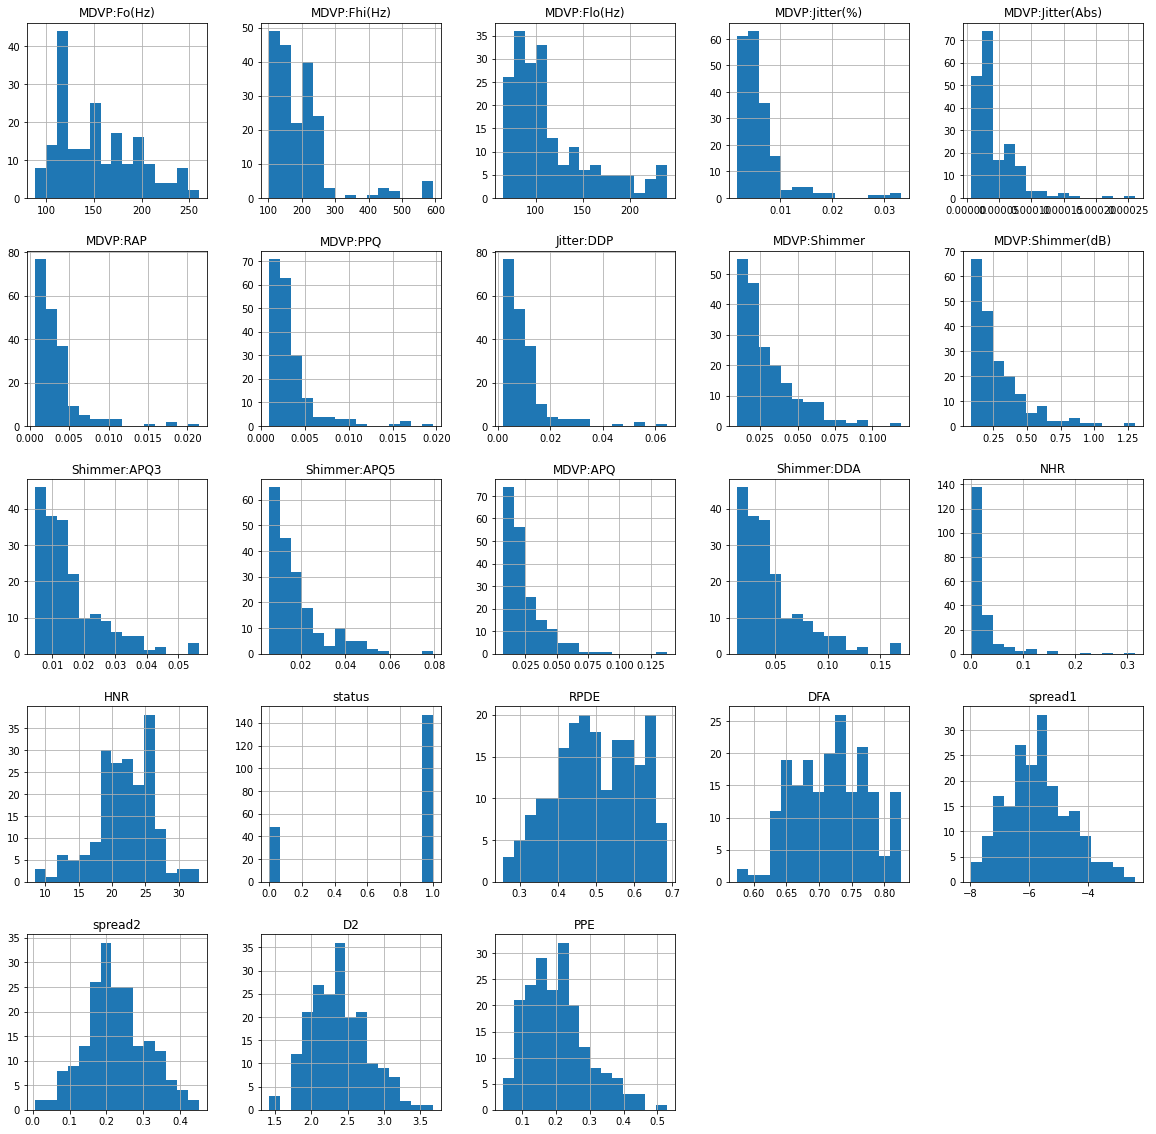

In [31]:
# distribution of features 
df.hist(figsize=(20,20),bins=15)
plt.title("Features Distribution")
plt.show()

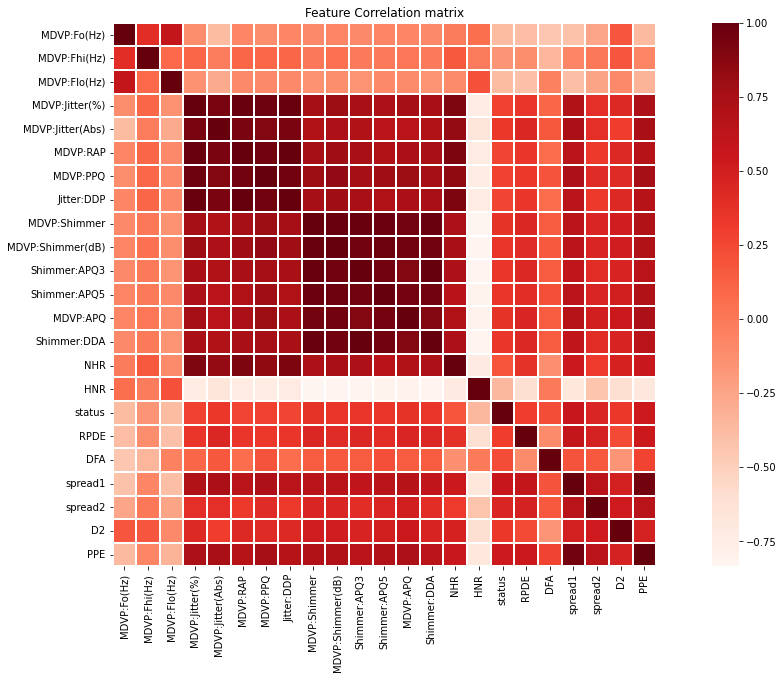

In [32]:
#Heatmap correlation
plt.figure(figsize =(20,10))
sns.heatmap(df.corr(),cmap= "Reds",square= True,linewidth = 0.2)
plt.title("Feature Correlation matrix")
plt.show()


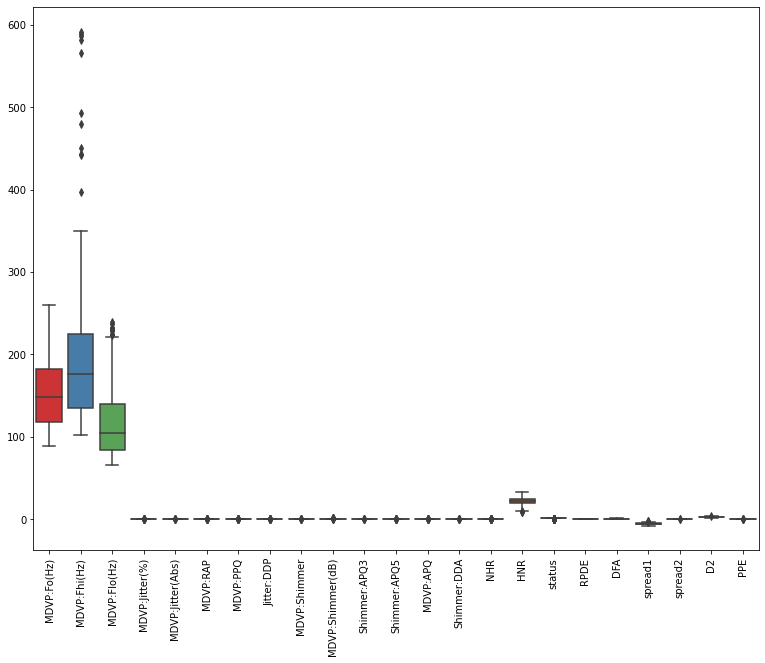

In [33]:
# boxplot to see distribution of data and determine the number of outliers 
plt.figure(figsize=(13,10))
sns.boxplot(data=df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

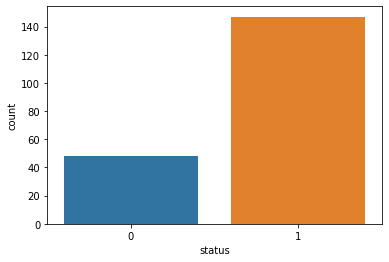

In [34]:
#number of cases with parkinsons and without parkinsons in the dataset
sns.countplot(x="status",data= df)
plt.show()

In [35]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [36]:
x = df.drop(columns=['status','name'],axis=1)
y = df['status']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [55]:
# Training and testing data using SVM
#start = dt.now()
# process stuff
#running_secs = (dt.now() - start).seconds
start_svm = dt.now()
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)
run_trainsvm = (dt.now() -start_svm)
start_svm2 = dt.now()
X_train_pred = model.predict(X_train)
run_testsvm = (dt.now() - start_svm2)
training_data_accuracy = accuracy_score(Y_train, X_train_pred)
print('Accuracy of Training Data :', training_data_accuracy*100, '%')
X_test_pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy of Testing Data :', testing_data_accuracy*100, '%')
print('Time required for training data',run_trainsvm,'seconds')
print('Time required for testing data',run_testsvm,'seconds')

Accuracy of Training Data : 87.82051282051282 %
Accuracy of Testing Data : 84.61538461538461 %
Time required for training data 0:00:00.001999 seconds
Time required for testing data 0:00:00.000996 seconds


In [38]:
# data scaling

data_rescaled = MinMaxScaler().fit_transform(x)
data_rescaled

# #PCA analysis for 2 principal components
pca = PCA(n_components = 2)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)
#  make them into another dataframe and add the status column to the modified dataframe 
df_reduced = pd.DataFrame(reduced,columns=['PC1','PC2'])
df_reduced['status'] = df['status']
df_reduced


,PC1,PC2,status
0,0.383018,-0.271346,1
1,0.832833,-0.094449,1
2,0.657950,-0.152101,1
3,0.727837,-0.157592,1
4,0.953852,-0.061909,1
...,...,...,...
190,0.000792,0.256324,0
191,-0.133570,0.285582,0
192,0.014911,0.229756,0
193,-0.181109,0.273762,0


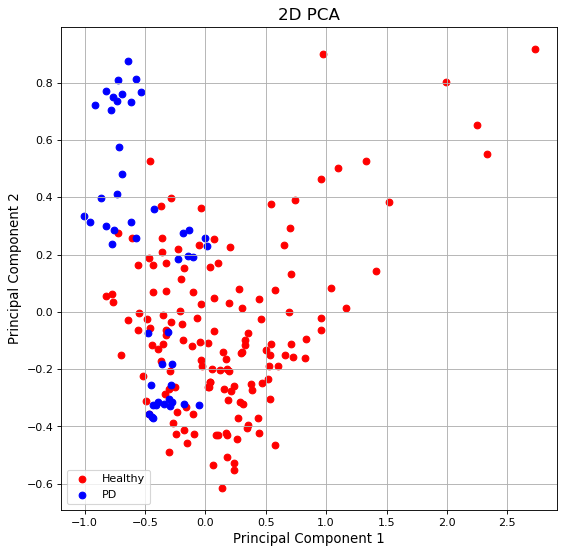

In [39]:
#plot the PCA against each other to see distribution of data
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(df_reduced.loc[df_reduced['status'] == clas, 'PC1'], 
                df_reduced.loc[df_reduced['status'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Healthy', 'PD'])
plt.grid()

In [40]:
#PCA analysis for 3 principal components
pca = PCA(n_components = 11)
pca.fit(data_rescaled)
reduced2 = pca.transform(data_rescaled)
# make them into another dataframe and add the status column to the modified dataframe 
df_reduced2 = pd.DataFrame(reduced2,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8''PC9','PC10','PC11','PC12'])
df_reduced2['status'] = df['status']
df_reduced2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8PC9,PC10,PC11,PC12,status
0,0.383018,-0.271346,-0.390232,0.106547,0.113721,-0.241899,-0.020993,0.035972,0.050055,-0.070456,-0.041208,1
1,0.832833,-0.094449,-0.492628,-0.132598,0.132877,-0.204646,0.031259,-0.021328,0.174249,-0.071684,-0.028576,1
2,0.657950,-0.152101,-0.544297,0.005999,0.146026,-0.105824,-0.006156,-0.028696,0.102005,-0.088538,-0.031355,1
3,0.727837,-0.157592,-0.511432,-0.057091,0.183617,-0.140158,-0.004544,-0.038224,0.172112,-0.095376,-0.035667,1
4,0.953852,-0.061909,-0.628521,0.115836,0.061528,-0.131377,-0.011430,0.080869,0.294710,-0.058015,0.005264,1
...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.000792,0.256324,0.155021,0.125940,-0.292945,-0.316643,-0.088591,-0.022284,0.050142,0.112974,-0.004066,0
191,-0.133570,0.285582,0.191287,0.157443,-0.040004,-0.252984,-0.148154,0.200831,-0.064015,0.061924,-0.012499,0
192,0.014911,0.229756,0.223775,0.520375,-0.028172,-0.021795,-0.248568,-0.041801,-0.253377,0.063856,-0.102200,0
193,-0.181109,0.273762,0.400164,0.380738,-0.000007,-0.163212,0.142562,0.003027,-0.138451,-0.111367,-0.167255,0


In [41]:
# Training and testing data split
x = df_reduced2.drop(columns=['status'],axis=1)
y = df_reduced2['status']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# Training and testing data using SVM
startsvm = dt.now()
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)
trainsvm = (dt.now() - startsvm)
startsvm2 = dt.now()
X_train_pred = model.predict(X_train)
testsvm = (dt.now() - startsvm2)
training_data_accuracy = accuracy_score(Y_train, X_train_pred)
print('Accuracy of Training Data :', training_data_accuracy*100, '%')
X_test_pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy of Testing Data :', testing_data_accuracy*100, '%')
print('Time required for training data',trainsvm,'seconds')
print('Time required for testing data',testsvm,'seconds')

Accuracy of Training Data : 87.82051282051282 %
Accuracy of Testing Data : 84.61538461538461 %
Time required for training data 0:00:00.010698 seconds
Time required for testing data 0:00:00.003273 seconds


In [58]:
#LOGISTIC REGRESION PRE PCA
scaler = StandardScaler() #Standardization data
startlr = dt.now()
modellr = LogisticRegression().fit(X_train,Y_train)
trainlr = (dt.now() - startlr)
startlr2 = dt.now()
X_train_pred = modellr.predict(X_train)
testlr = (dt.now() - startlr2)
training_data_accuracy = accuracy_score(Y_train, X_train_pred)
print('Accuracy of Training Data :', training_data_accuracy*100, '%')
X_test_pred = modellr.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy of Testing Data :', testing_data_accuracy*100, '%')
print('Time required for training data',trainlr,'seconds')
print('Time required for testing data',testlr,'seconds')

Accuracy of Training Data : 87.17948717948718 %
Accuracy of Testing Data : 84.61538461538461 %
Time required for training data 0:00:00.018968 seconds
Time required for testing data 0:00:00.001937 seconds


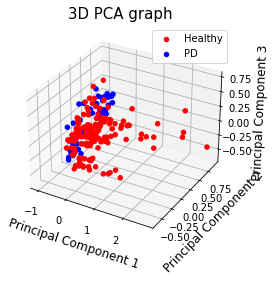

In [44]:
#3d plot to get view of data distribution 
fig = plt.figure()
ax = plt.axes(projection='3d')
classes = [1, 0]
colors = ['r', 'b']
#print(df_reduced2.loc[df_reduced['status'] == clas, 'PC1'])
# for clas ,color in (classes,colors):
#df_reduced2.iloc[df_reduced['status']==clas]
for clas, color in zip(classes, colors):
    ax.scatter3D(df_reduced2.loc[df_reduced['status'] == clas, 'PC1'], 
                df_reduced2.loc[df_reduced['status'] == clas, 'PC2'],
                df_reduced2.loc[df_reduced['status'] == clas, 'PC3'],
                c = color,alpha=1) # alpha = 1 added for removing transparency which is default setting added to 3d plot
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_zlabel('Principal Component 3', fontsize =12)
ax.set_title('3D PCA graph ', fontsize = 15)
ax.legend(['Healthy', 'PD'])



In [45]:
#splitting dataset into training and testing  
x = df_reduced2.drop('status',axis=1)
y = df['status']
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [59]:
#SVM for PCA components (non-optimized)
model1 = svm.SVC(kernel='linear')
startsvm3 = dt.now() 
model1.fit(x_train, y_train)
traintimeforsvm = (dt.now()- startsvm3)
x_train_pred = model1.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_pred)
print('Accuracy of Training Data :', training_data_accuracy*100, '%')
startsvm4 = dt.now()
x_test_pred = model1.predict(x_test)
testtimeforsvm = (dt.now()- startsvm4)
testing_data_accuracy = accuracy_score(y_test, x_test_pred)
print('Accuracy of Testing Data :', testing_data_accuracy*100, '%')
print('Time required for training data',traintimeforsvm,'seconds')
print('Time required for testing data',testtimeforsvm,'seconds')

Accuracy of Training Data : 88.97058823529412 %
Accuracy of Testing Data : 88.13559322033898 %
Time required for training data 0:00:00.009015 seconds
Time required for testing data 0:00:00.001758 seconds


In [61]:
# #Logistic Regression for PCA components 
scaler = StandardScaler() #Standardization data
startle = dt.now()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LogisticRegression().fit(x_train,y_train)
trainlrpca = (dt.now() - startle)
x_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_pred)
print('Accuracy of Training Data :', training_data_accuracy*100, '%')
startle2 = dt.now()
x_test_pred = model.predict(x_test)
testlrpca = (dt.now() - startle2)
testing_data_accuracy = accuracy_score(y_test, x_test_pred)
print('Accuracy of Testing Data :', testing_data_accuracy*100, '%')
print('Time required for training data',trainlrpca,'seconds')
print('Time required for testing data',testlrpca,'seconds')
 # start = time.time() # start time of model

#    end_train = time.time() # time required for training data
#y_predictions = model.predict(x_test) # testing data predictions
# #  end_predict = time.time() #time taken for predictions



Accuracy of Training Data : 87.5 %
Accuracy of Testing Data : 84.7457627118644 %
Time required for training data 0:00:00.023939 seconds
Time required for testing data 0:00:00.001001 seconds


In [48]:
# accuracy = accuracy_score(y_test,y_predictions)
# precision = precision_score(y_test,y_predictions)
# print('Accuracy of PCA analysis :',accuracy*100,'%')

AttributeError: 'function' object has no attribute 'axhline'

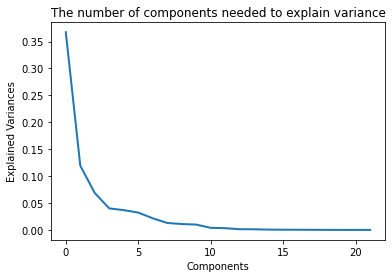

In [49]:
#  Principal component analysis for feature extraction (feature optimization)
from matplotlib.pyplot import plot, xlabel, ylabel,figure 
from sklearn.decomposition import PCA
pca2 = PCA().fit(data_rescaled)
plot(pca2.explained_variance_, linewidth=2,)
xlabel('Components')
ylabel('Explained Variances')
plt.title('The number of components needed to explain variance')
plot.axhline(y=0.95, color='r', linestyle='-')
plot.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
show()